In [18]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import time
from matplotlib import pyplot

In [93]:
def get_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    x_train = keras.utils.normalize(x_train, axis=1)
    x_test = keras.utils.normalize(x_test, axis=1)

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

start_time = time.time()
training, testing = get_data()
print("Got Data in {} seconds".format(time.time() - start_time))


Got Data in 0.6707086563110352 seconds


In [94]:
def build_NN():
    model = keras.models.Sequential(
        [
            keras.Input(shape = (28, 28, 1)),
            layers.Conv2D(64, kernel_size=(5,5),padding="same", activation="relu"),
            layers.MaxPooling2D(padding="same"),
            layers.Conv2D(32, kernel_size=(3,3),padding="same", activation="relu"),
            layers.MaxPooling2D(padding="same"),
            layers.Conv2D(64, kernel_size=(5,5),padding="same", activation="relu"),
            layers.MaxPooling2D(padding="same"),
            layers.Flatten(),
            layers.Dropout(.5),
            layers.Dense(10, activation="softmax"),

        ]
    )

    model.summary()
    
    

    return model

network = build_NN()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)            

In [95]:
def train_model(model):
    num_epochs = 25
    batch_size = 128

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.fit(training[0], training[1], batch_size=batch_size, epochs=num_epochs)


start_time = time.time()
train_model(network)
print("Time taken to trian: {}".format(time.time()-start_time))

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3235 - accuracy: 0.8960

In [96]:
def eval_model(model):
    results = model.evaluate(testing[0], testing[1])

    print("Test Accuracy: {}".format(results[1]))

eval_model(network)



313/313 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9937
Test Accuracy: 0.9937000274658203


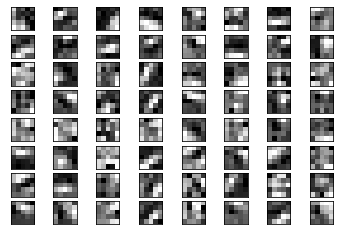

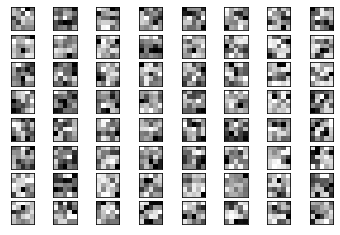

In [97]:
def visualize_filters(filters, layer_number):
    #filters, biases = model.layers[0].get_weights()
    f = filters[:, :, 0, :]
    num_filters, curr_cell = 64,1

    for block in range(num_filters):
        ax = pyplot.subplot(8, 8, curr_cell)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(f[:, :, block], cmap="Greys")
        curr_cell += 1

    pyplot.savefig(layer_number + "_layer.png")
    pyplot.show()


visualize_filters(network.layers[0].get_weights()[0], "first")
visualize_filters(network.layers[4].get_weights()[0], "third")